# KAPpaxsim tutorial

This tutorial is a quickstart guide on how to install and use **KAPpaxsim**\
**KAPpaxsim** is a python module designed to modelize and simulate the passenger\
flows in various KAP terminal buildings.

## Setup and Install
**(see README.md)**

Detailed start guide

1. Install & start [Anaconda](https://www.anaconda.com/products/individual "Anaconda download") <-
to install and manage python environments
2. Download & unzip [source code](https://github.com/AntoineGlacet/KAPpaxsim/archive/refs/heads/main.zip "download code as a zip") in your project directory
3. Install the conda env from template
    1. locate environment.yml in root of downloaded code
    2. open a conda command prompt and go to that directory (root)
    3. execute `conda env create --name myenv --file environment.yml
4. install src (pip install -e . in conda terminal from root)
5. run the tutorial notebook /notebook/tutorial.ipynb



## Import data from sharepoint

In [4]:
from src.utils.sharepoint import get_ADRM_param_full, get_schedule_forecast

In [4]:
%load_ext autoreload
%autoreload 2

In [ ]:
# just use convenient functions to directly download the data from Sharepoint
# to local folder /data/raw
# .env file with Sharepoint secret password is required
# for security, this file is never uploaded to github
# please send me (Antoine) en email to get it

get_ADRM_param_full()
get_schedule_forecast()

## Run a first simulation!

### generate Pax show up and counter allocation

In [11]:
from src.utils.profiles import generate_dep_Pax_Counters
from src.utils.profiles import generate_arr_Pax

# look into the functions to check-out some options!
df_Pax_dep, df_Counters_dep = generate_dep_Pax_Counters(target_peak = 3200, terminal='T1')
df_pax_arr = generate_arr_Pax(target_peak= 3200, terminal='T1')

Pax and counter generation...: 100%|█████████████████████████████████████████████████████| 2/2 [00:34<00:00, 17.06s/it]


NameError: name 'T1' is not defined

In [ ]:
df_Pax

In [5]:
df_Counters_dep

In [ ]:
df_pax_arr

### run the simulation

In [5]:
# for the exemple, let's work with T1 arrivals for covid
# and T1 departures
from src.simfunc.KIX_T1a_covid import KIX_T1a_covid
from src.simfunc.KIX_T1d import KIX_T1d

In [ ]:
# look at the parameters of the function with alt+tab!
KIX_T1d()
KIX_T1a_covid()

In [12]:
# create a dictionnary
# the Pt are in minutes !
dct_param = {
    'path':None,
    'df_Pax':df_Pax_dep, # generated before
    'df_Counters':df_Counters_dep, # generated before
    'Pt_checkin_1step_counter':2.5,
    'Pt_checkin_2step_counter':1.5,
    'N_kiosk':92,
    'Pt_kiosk':1.5,
    'N_security_lanes':16,
    'Pt_security_lanes':14/60,
    'N_emigration_counter':20,
    'Pt_emigration_counter':23/60,
    'N_emigration_self':23,
    'Pt_emigration_self':28/60,
    'modern_pax_ratio':0.1,
    'digital_pax_ratio':0.05,
    'premium_pax_ratio':0.05,
    'show_graph':True,
}

Simulation running...: 100%|███████████████████████████████████████████████████████| 1440/1440 [04:07<00:00,  5.81it/s]


   path  Pt_checkin_1step_counter  Pt_checkin_2step_counter  N_kiosk  \
0  None                  0.041667                     0.025       92   

   Pt_kiosk  N_security_lanes  Pt_security_lanes  N_emigration_counter  \
0     0.025                16           0.003889                    20   

   Pt_emigration_counter  N_emigration_self  ...  premium_pax_ratio  \
0               0.006389                 23  ...               0.05   

   start_special_pax_ratio  end_special_pax_ratio   freq  win  show_loading  \
0                      0.3                   0.95  10min    1          True   

  show_graph  save_graph  save_xls  call_n_iter  
0       True       False     False         None  

[1 rows x 23 columns]


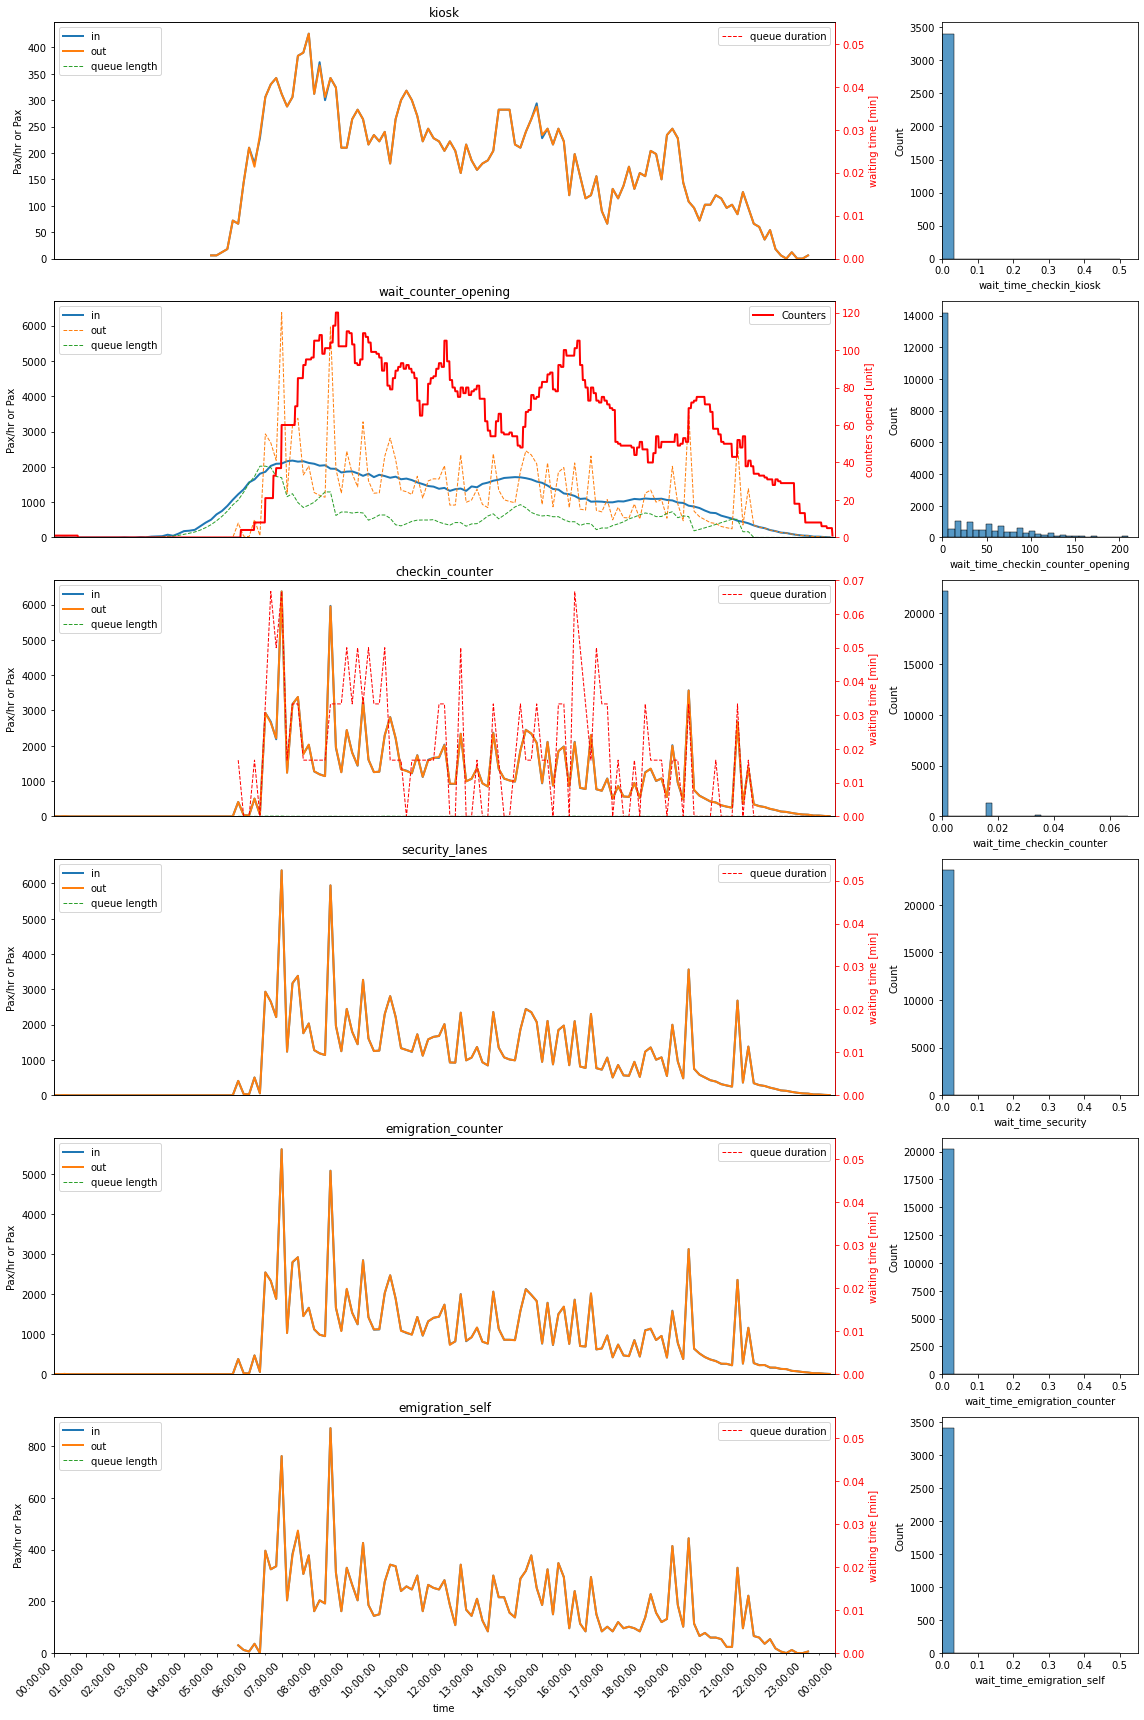

In [13]:
# cool feature: unpack the dictionnary to pass
# the arguments to the function
(
    df_result,
    list_KPI_run,
    dct_hist_wait_time,
    dct_hist_queue_length,
)=KIX_T1d(**dct_param)

## Change some parameters

### show-up & traffic

### PT & N 

### Allocation rule

## Run an optimization loop